In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.columns = df.columns.str.replace(' ','_').str.lower()

In [5]:
strings = list(df.dtypes[df.dtypes=='object'].index)

In [6]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ','_')

## Exploratory Data Analysis

Aprender de los datos, ver qué hay

Some series are of numbers other of strings

In [7]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

### Use graphics to easily visualize patterns

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

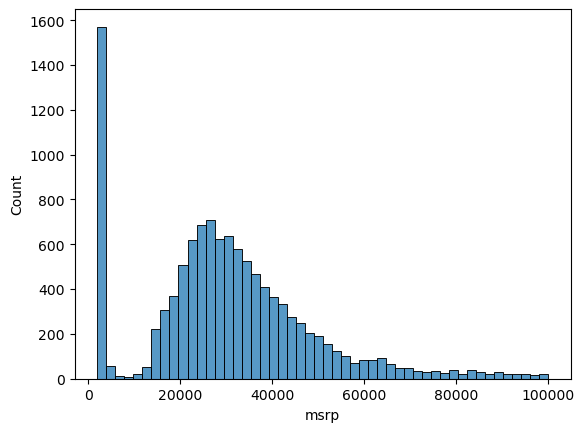

In [9]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

## To zoom in or out just select a narrow set of varaibles 

# Identify the distribution, shape
# Identify outliers

1. price of one thousand is weird
2. the shape has a long tail
3. it might be a common distribution for prices
4. Most are cheap but there is a narrower market that works with larger prices

### The tail will confuse the model, so we have to get rid of it

Apply the logarithm distribution

In [10]:
np.log1p([0,1,10,100,1000])

array([0.        , 0.69314718, 2.39789527, 4.61512052, 6.90875478])

In [11]:
prices_logs = np.log1p(df.msrp)

In [12]:
prices_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<Axes: xlabel='msrp', ylabel='Count'>

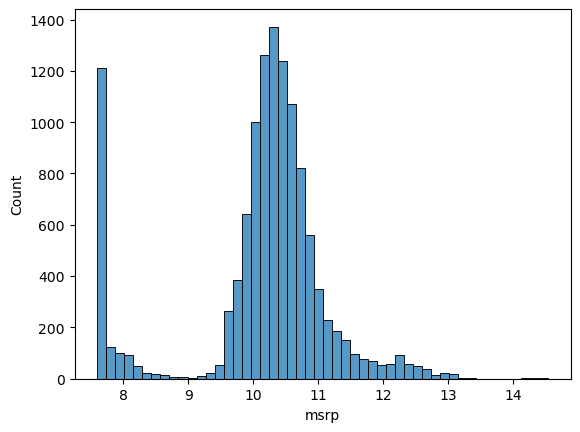

In [13]:
sns.histplot(prices_logs,bins=50)

It looks like a normal distribution and this situaion is ideal for models
Long tailed distributions confuse our models, one way of getting rid of atils is applying log

### Missing values

In [14]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

### Setting up the validation framework

In [15]:
n = len(df)
n_test= int(n*0.2)
n_val = int(n*0.2)
n_train = n - n_test - n_val

In [16]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [17]:
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

In [18]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_val+n_train]]
df_test = df.iloc[idx[n_val+n_train:]]

In [19]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [20]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [21]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [22]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)


In [23]:
## Delete the series that we separated 
## not to mix things up, because our model can be deceiptively perfect
## with the target as a feature

del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [24]:
len(y_train)

7150

### Linear regression

In [25]:
# We will use some characteristics:
# engine_hp
# highway_mpg
# popularity

#"To make it shorter (?)"
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [26]:
xi = [453,11,86]

In [27]:
def g(xi):
    #do something
    return 100000
    

In [28]:
g(xi)

100000

In [29]:
w0 = 7.17
w  = [0.01, 0.04, 0.002]

In [30]:
def linear_regression(xi):
    n = len(xi)
    pred = w0
    for j in range(n):
        pred = pred + w[j]*xi[j]
    return pred

In [31]:
linear_regression(xi)

12.312

In [32]:
np.expm1(12.312)

222347.2221101062

### Linear regression vector form

In [33]:
def dot(xi, w):
    n= len(xi)
    ans=0.0
    for j in range(n):
        ans+=xi[j]*w[j]
    return ans

In [34]:
def linear_regression(xi):
    return w0 + dot(xi,w)

In [35]:
linear_regression(xi)

12.312000000000001

In [36]:
w_new= [w0]+w

In [37]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [38]:
def linear_regression(xi):
    xi = [1]+xi
    return dot(w_new,xi)

In [39]:
linear_regression(xi)

12.312

In [40]:
xi = [453,11,86]
w0 = 7.17
w  = [0.01, 0.04, 0.002]

x1 = [1, 148, 24, 1385]
x2 = [1, 132, 23, 4342]
x3 = [1, 453, 11, 86]

X = [x1, x2, x3]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   23, 4342],
       [   1,  453,   11,   86]])

In [41]:
def linear_regression(X):
    return X.dot(w_new)

In [42]:
linear_regression(X)

array([12.38 , 18.094, 12.312])

### Training the linear regression model

In [43]:
def train_linear_regression(X,y):
    pass

In [44]:
X = [
 [148, 24, 1385],
 [132, 23, 4342],
 [453, 35, 2311],
 [486, 24, 1385],
 [376, 23, 4342],
 [543, 54, 2345],
 [435, 34, 1233],
 [644, 74, 7522],
 [265, 33, 5433],
]
X = np.array(X)

In [45]:
ones = np.ones(X.shape[0])

In [46]:
y = [10330, 25400, 15540, 23220, 12653, 39332, 30764, 34114, 43455]

In [47]:
XTX = X.T.dot(X)

In [48]:
XTX_inv = np.linalg.inv(XTX)

In [49]:
# Machine precision is not good
# If the matrix doesn't have inverse it won't tell me right?
XTX.dot(XTX_inv).round(1)

array([[ 1.,  0.,  0.],
       [ 0.,  1., -0.],
       [ 0., -0.,  1.]])

In [50]:
w_full = XTX_inv.dot(X.T).dot(y)

In [51]:
w0 = w_full[0]
w = w_full[1:]

In [52]:
w0, w

(13.524346366609555, array([385.41710803,   1.59118928]))

In [53]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.c_[ones,X]
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [54]:
train_linear_regression(X, y)

(13237.871992096709, array([ -9.05457022, 407.56229996,   0.49986733]))

### Car price baseline model

In [55]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [56]:
base = ['engine_hp','engine_cylinders','highway_mpg', 'city_mpg', 'popularity']
df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [57]:
X_train = df_train[base].fillna(0).values
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [58]:
w0, w = train_linear_regression(X_train, y_train)

In [59]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

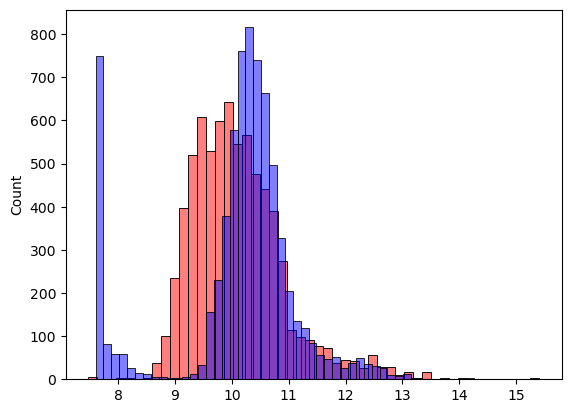

In [60]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50,label='predict')
sns.histplot(y_train, color='blue', alpha=0.5, bins = 50, label='target')


### Model is off, we have to quantify the error

## RMSE

In [61]:
def rmse(y, y_pred):
    e = y-y_pred
    se = e**2
    mse = se.mean()
    return np.sqrt(mse)


In [62]:
def prepare_X(df):
    return df[base].fillna(0).values
    

In [63]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val= prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.7616530991301591

## Feature Engineering


In [64]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017-df.year
    features = base + ['age']
    return df[features].fillna(0).values
    

In [65]:
X_train = prepare_X(df_train)
X_train

array([[1.480e+02, 4.000e+00, 3.300e+01, 2.400e+01, 1.385e+03, 9.000e+00],
       [1.320e+02, 4.000e+00, 3.200e+01, 2.500e+01, 2.031e+03, 5.000e+00],
       [1.480e+02, 4.000e+00, 3.700e+01, 2.800e+01, 6.400e+02, 1.000e+00],
       ...,
       [2.850e+02, 6.000e+00, 2.200e+01, 1.700e+01, 5.490e+02, 2.000e+00],
       [5.630e+02, 1.200e+01, 2.100e+01, 1.300e+01, 8.600e+01, 3.000e+00],
       [2.000e+02, 4.000e+00, 3.100e+01, 2.200e+01, 8.730e+02, 0.000e+00]])

In [66]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [67]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val= prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.5172055461058329

<Axes: ylabel='Count'>

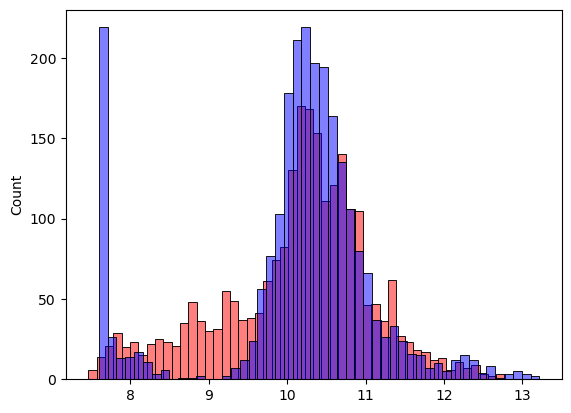

In [68]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50,label='predict')
sns.histplot(y_val, color='blue', alpha=0.5, bins = 50, label='target')


## Categorical variables

In [70]:
df_train.number_of_doors

# We notice it is a set of varaibles

0       2.0
1       4.0
2       4.0
3       3.0
4       4.0
       ... 
7145    2.0
7146    2.0
7147    4.0
7148    4.0
7149    4.0
Name: number_of_doors, Length: 7150, dtype: float64

In [87]:
# Function that takes a df and returns it without missing values, 
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017-df.year
    features = base + ['age']
    for i in range(2, 5):
        df[f'num_doors_{i}'] = (df.number_of_doors == i).astype('int')
        features.append(f'num_doors_{i}')
    return df[features].fillna(0).values
    

In [88]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val= prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.5157995641503232

In [94]:
makes = list(df.make.value_counts().head().index)

In [95]:
# Function that takes a df and returns it without missing values, 
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017-df.year
    features = base + ['age']
    for i in range(2, 5):
        df[f'num_doors_{i}'] = (df.number_of_doors == i).astype('int')
        features.append(f'num_doors_{i}')
    for i in makes:
        df[f'make_{i}'] = (df.make == i).astype('int')
        features.append(f'make_{i}')
    return df[features].fillna(0).values
    

In [96]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val= prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.5076038849557535

In [97]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
num_doors_2            int64
num_doors_3            int64
num_doors_4            int64
dtype: object

In [136]:
categories_ = ['number_of_doors','make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']

In [137]:
# Get a list of the most common categories
categories = {}

for c in categories_:
    categories[c] = list(df[c].value_counts().head().index)

In [138]:
categories

{'number_of_doors': [4.0, 2.0, 3.0],
 'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [139]:
# Function that takes a df and returns it without missing values, 
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017-df.year
    features = base + ['age']
    for i, v in categories.items():
        for vv in v:
            df[f'{i}_{vv}'] = (df[i] == vv).astype('int')
            features.append(f'{i}_{vv}')
    return df[features].fillna(0).values
    

In [140]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val= prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

92.91757380875063

In [141]:
w0

-2.609647800442819e+16

## Regularization

In [144]:
def train_linear_regression_reg(X,y, r=0.01):
    ones = np.ones(X.shape[0])
    X = np.c_[ones,X]
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [178]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train,r=0.5)

X_val= prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.45682336514092386

<Axes: ylabel='Count'>

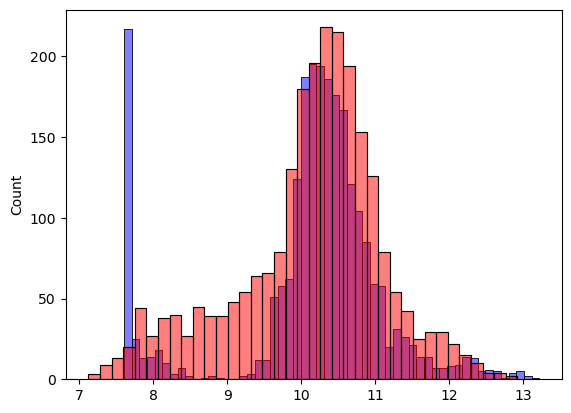

In [148]:
sns.histplot(y_val,color='blue',alpha=0.5)
sns.histplot(y_pred,color='red',alpha=0.5)

## tuning the model

In [166]:
for d in np.arange(10):
    r = (10**d)/10**7
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train,r)
    
    X_val= prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    print(r, w0, score)

1e-07 -46084.85045768432 0.45651844094622185
1e-06 -695.560899666151 0.4565171858137353
1e-05 -6.518811521480508 0.4565170333593813
0.0001 6.264136301474879 0.45651706780889023
0.001 6.284236758741841 0.45651750870361335
0.01 6.2766116375184255 0.4565219900622768
0.1 6.191208644410894 0.4565692763006366
1.0 5.634896668298442 0.4572204317999789
10.0 4.283980108960062 0.47014569320966615
100.0 2.4990470830024005 0.5786709462476508


## Using the model

In [170]:
df_full_train = pd.concat([df_train, df_val])

In [172]:
df_full_train = df_full_train.reset_index(drop=True)

In [173]:
X_full_train = prepare_X(df_full_train)

In [175]:
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

In [195]:
y_full_train = np.r_[y_train,y_val]

In [202]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train,r=0.5)
print(w0,w)
X_test= prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
print(score)

5.946139659124542 [ 1.55336700e-03  1.20428516e-01 -5.93071412e-03 -4.45462724e-03
 -4.87279271e-05 -9.63938809e-02 -6.76274136e-02 -2.26126517e-01
 -3.18235937e-01 -4.21956556e-02  1.75195713e-01  1.67836887e-03
 -1.01666940e-01 -9.21981644e-02 -4.31882776e-01  1.13226482e-01
 -2.80782020e-01 -5.16358639e-01 -5.33463989e-02  1.03089378e+00
  8.56001285e-01  1.08283530e+00  2.54200176e+00  4.34407538e-01
  1.53213711e+00  1.43544296e+00  1.52518376e+00  1.45337583e+00
 -9.57679553e-02  3.86513082e-02 -5.82900460e-02 -2.46617452e-02
 -1.40073341e-02  2.06301533e+00  1.94842409e+00  1.93470024e+00
 -5.14947545e-02  5.76616751e-02  1.83969667e-01  3.33049392e-01
 -1.64317792e-01]
0.4520417914420306


## We want to actually use our model

In [206]:
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [207]:
df_small = pd.DataFrame([car])

In [211]:
X_small = prepare_X(df_small)

In [212]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

10.458255060672798

In [214]:
np.expm1(y_pred)

34829.72089486338

In [215]:
np.expm1(y_test[20])

35000.00000000001